<a href="https://colab.research.google.com/github/jdelebec/Advanced_machine_learning_project1/blob/main/Advanced_Machine_Learning_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projet Advanced Machine Learning: Text synthesis
Simon Hervé  
Jean-Louis Delebecque  
Lien du github: https://github.com/jdelebec/Advanced_machine_learning_project1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Extraction des textes**

On utilise la librairie Beautifulsoup pour extraire les données des XML.

In [ ]:
# Packages for extracting data

import bs4
from bs4 import BeautifulSoup as bs
import lxml
import pandas as pd
import numpy as np

Afin de pouvoir travailler à deux sur le projet nous avons fait un google collabs partagé, d'ou la présence de deux path


In [ ]:
simon_path = "/content/drive/MyDrive/ESILV S9/Advanced machine learning/corpus_taln_v1.tei.xml"
jl_path = "/content/drive/MyDrive/Advanced_ml/corpus_taln_v1.tei.xml"

In [ ]:
#Pour JL
content = []
with open(jl_path, "r") as file:
  content = file.readlines()
  content = "".join(content)
  soup = bs(content, "lxml")

In [ ]:
#Pour Simon
content = []
with open(simon_path, "r") as file:
  content = file.readlines()
  content = "".join(content)
  soup = bs(content, "lxml")

La stratégie d'extraction des données est d'appliquer la fonction get_text() à chaque balise <tei> dans le corpus_taln_v1.tei.xml. 
La function va extraire le titre de la publication, le nom du ou des auteurs quand il y en a, l'email du ou des auteurs si il y en a. De plus, elle récupère les abstract en français et en anglais ainsi que les mots clés en français et en anglais. Pour la partie text, la fonction compile tous les textes en une partie.

In [ ]:
def get_text(soup):

  dic = {}

  #================================================================
  language = soup.fin
  title = soup.find("title").get_text().replace("\n\t", "")
  author = soup.find("author")
  author_names = author.find_all("name")
  tab_name = []
  for name in author_names:
    tab_name.append(name.get_text())
  publication_place = soup.find("pubplace").get_text()
  publication_date = soup.find("publicationstmt").find("date").get_text()
  editor_name = soup.find("editor").find("name").get_text()
  monogr_title = soup.find("monogr").find("title").get_text()
  monogr_date = soup.find("monogr").find("date").get_text()
  abstract = soup.find("text").find_all("div", {"type": "abstract"})
  abstract_fr = abstract[0].find("p").get_text().replace("\n\t", "")
  abstract_eng = abstract[1].find("p").get_text().replace("\n\t", "")
  keywords = soup.find("text").find_all("div", {"type": "keywords"})
  keywords_fr = keywords[0].find("p").get_text().replace("\n\t", "")
  keywords_eng = keywords[1].find("p").get_text().replace("\n\t", "")
  sections = soup.find_all("div", {"type": "section"})
  tab = []

  #============================================================

  # Introduction - Sections - Conclusion
  sections = soup.find_all("div", {"type": "section"})
  for section in sections:
    # title section
    try:
      title_sec = section.get_text().split("\n")[2]
      tab.append(title_sec)
    except:
      pass
    # paragraph section
    try:
      parag_sec = section.find("p").get_text().replace("\n\t", "")
      tab.append(parag_sec)
    except:
      pass
    # Subsection
    try:
      subsections = section.find_all("div", {"type": "subsection"})
      for sub in subsections:
        # title subsection
        title_sub = sub.get_text().split("\n")[2]
        tab.append(title_sub)
      
        # paragraphs subsection
        paragraphs = sub.find_all("p")
        for parag in paragraphs:
          tab.append(parag.get_text().replace("\n\t", ""))
        
        # sub note
        try:
          notes = sub.find_all("note")
          for note in notes:
            tab.append(note.get_text())
        except:
          pass
    
    except:
      pass
    
    # note
    try:
      notes = section.find_all("note")
      for note in notes:
        tab.append(note.get_text())
    except:
      pass


  # Bibl

  try:
    bibl = soup.find("bibl").get_text()
    tab.append(bibl)
  except:
    pass

  #===============================================================

  dic["title"] = title
  dic["author_name"] =  ",".join(str(elem) for elem in tab_name)
  try:
    tab_email = []
    author_emails = author.find_all("email")
    for email in author_emails:
      tab_email.append(email.get_text().replace("\n", ""))
    dic["author_email"] =  ",".join(str(elem) for elem in tab_email)
  except:
    dic["author_email"] = None
  dic["publication_place"] = publication_place
  dic["publication_date"] = publication_date
  dic["editor_name"] = editor_name
  dic["monogr_title"] = monogr_title
  dic["monogr_date"] = monogr_date
  dic["abstract_fr"] = abstract_fr
  dic["abstract_eng"] = abstract_eng
  dic["keywords_fr"] = keywords_fr
  dic["keywords_eng"] = keywords_eng
  dic["text"] = " ".join(str(elem) for elem in tab)

  #>
  return dic


In [ ]:
corpus = []
texts = soup.find_all("tei")
for text in texts:
  corpus.append(get_text(text))

On transforme ensuite le tableau de dictionnaires contenant les données en un dataframe grâce à la fonction DataFrame de la librairie pandas.


In [ ]:
df = pd.DataFrame(corpus)

In [ ]:
df.head()

,title,author_name,author_email,publication_place,publication_date,editor_name,monogr_title,monogr_date,abstract_fr,abstract_eng,keywords_fr,keywords_eng,text
0,\nÉléments de conception d'un système d'interp...,"Delphine Battistelli,Cyril Valliez","battiste@msh-paris.fr,valliez@msh-paris.fr",Grenoble,1997,Damien Genthial,4e conférence sur le Traitement Automatique de...,1997,\nNous considérons dans notre travail la tâche...,None,None,None,Architecture globale du système \nLe modèle de...
1,\nInformatisation du dictionnaire explicatif e...,Gilles Sérasset,Gilles.Serasset@imag.fr,Grenoble,1997,Damien Genthial,4e conférence sur le Traitement Automatique de...,1997,\nNous donnons ici un aperçu du logiciel DECID...,None,None,None,Introduction \nDans le domaine de l'ingénieri...
2,\nConstruction d'une représentation sémantique...,"Pierre Zweigenbaum,Jacques Bouaud","pz@biomath.jussieu.fr,jb@biomath.jussieu.fr",Grenoble,1997,Damien Genthial,4e conférence sur le Traitement Automatique de...,1997,\nDiverses méthodes ont été proposées pour con...,None,None,None,
3,\nSystèmes de types pour la (lambda-)DRT ascen...,"Pascal Amsili,Nabil Hathout","amsili@linguist.jussieu.fr,hathout@inalf.cnrs.fr",Paris,1998,Pierre Zweigenbaum,5e conférence sur le Traitement Automatique de...,1998,\nLe terme de lambda-DRT désigne un ensemble d...,None,None,None,Introduction \nLa « Théorie des Représentation...
4,\nUne grammaire TAG vue comme une grammaire Se...,"Marie-Hélène Candito,Sylvain Kahane","marie-helene.candito@linguist.jussieu.fr,sk@cc...",Paris,1998,Pierre Zweigenbaum,5e conférence sur le Traitement Automatique de...,1998,"\nDans cet article, nous comparons deux modèle...",None,None,None,Introduction \nTAG est un formalisme initialem...


On enregistre le dataframe pour l'exporter.


In [ ]:
#Pour Simon
df.to_csv("/content/drive/MyDrive/ESILV S9/Advanced machine learning/corpus.csv")

In [ ]:
#Pour JL
df.to_csv("/content/drive/MyDrive/Advanced_ml/corpus.cs")

Pour la suite du projet on va se concentrer sur les abstract_fr car c'est la colonne où il y a le moins de données manquantes (67).

On installe le lemmatizer fr_core_news_sm, mais on pourrait aussi utiliser le fr_core_news_md.

In [ ]:
!python -m spacy download fr_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')


On importe les packages nécéssaires au processing des données textuelles.

In [ ]:
# Packages for processing

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
nltk.download("stopwords")
from nltk.corpus import stopwords
french_stopwords = set(stopwords.words("french"))
import unicodedata
import re
import spacy
import fr_core_news_sm 
nlp = fr_core_news_sm.load()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



**Processing**

Crée des fonctions qui font le processing classique de texte. Dans notre démarche on va essayer de voir l'incidence du processing sur les résultats. Pour cela on créer plusieurs wrappers où l'ordre d'appel des fonctions est différent. On fait cette démarche car on se rend compte qu'il y a de mauvaises transcriptions après processing avec par exemple issus qui devient i us.

In [ ]:
# Processing

def remove_accents(text):
    
    norm = unicodedata.normalize('NFKD', str(text))
    ascii = norm.encode('ascii', 'ignore')
    text = ascii.decode('utf-8', 'ignore')
    return text

def lower_letters(text):
    
    return text.lower()

def drop_slash_n(text):
    
    return re.sub(r"\n", "", text)

def drop_special_carac(text):
    
    return re.sub(r"[^a-zA-Z\d\s]", " ", text)

def drop_brackets(text):

    return re.sub(r"\[(.*?)\]", "", text)

def drop_extra_space(text):
    
    return re.sub(r"s{2,}", " ", text)

def remove_stop_words(text):
    
    text = word_tokenize(text)
    text = " ".join([word for word in text if not word in french_stopwords])
    return text

def lemmatize(text):
    
    text = nlp(text)
    text = " ".join([word.lemma_ for word in text])
    return text

def drop_double_space(text):
    return re.sub(' +', ' ', text)

def drop_single_char(text):
    return re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', text)

# =============================================================================

# Wrapper 

def processing1(text):
    
    text = str(text)
    text = remove_accents(text)
    text = lower_letters(text)
    text = drop_slash_n(text)
    text = drop_special_carac(text)
    text = drop_extra_space(text)
    text = remove_stop_words(text)
    text = lemmatize(text)
    
    return text

def processing2(text):
    
    text = str(text)
    text = remove_accents(text)
    text = lower_letters(text)
    text = drop_slash_n(text)
    text = drop_special_carac(text)
    text = remove_stop_words(text)
    text = lemmatize(text)
     
    return text

def processing3(text):
    
    text = str(text)
    text = lower_letters(text)
    text = remove_accents(text)
    text = remove_stop_words(text)
    text = drop_slash_n(text)
    text = drop_special_carac(text)
    text = lemmatize(text)
    
    return text

def processing4(text):
    
    text = str(text)
    text = remove_accents(text)
    text = lower_letters(text)
    text = drop_slash_n(text)
    
    return text

def processing5(text):
    
    text = str(text)
    text = lower_letters(text)
    text = remove_stop_words(text)
    text = remove_accents(text)
    text = drop_slash_n(text)
    text = drop_special_carac(text)
    text = lemmatize(text)
    
    return text

def processing6(text):
    
    text = str(text)
    text = lower_letters(text)
    text = lemmatize(text)
    text = remove_stop_words(text)
    text = remove_accents(text)
    text = drop_slash_n(text)
    text = drop_special_carac(text)
    
    return text

def processing7(text):

    text = str(text)
    text = drop_brackets(text)
    text = lower_letters(text)
    text = remove_stop_words(text)
    text = remove_accents(text)
    text = drop_slash_n(text)
    text = drop_special_carac(text)
    text = drop_double_space(text)
    text = drop_single_char(text)
    
    return text

def processing8(text):

    text = str(text)
    text = drop_brackets(text)
    text = lower_letters(text)
    text = lemmatize(text)
    text = remove_stop_words(text)
    text = remove_accents(text)
    text = drop_slash_n(text)
    text = drop_special_carac(text)
    text = drop_double_space(text)
    text = drop_single_char(text)
    
    return text

On applique les différents processing qui génèrent une nouvelle colonne à chaque fois.

In [ ]:
df["abstract_fr_proc_1"] = df.apply(lambda x: processing1(x["abstract_fr"]), axis=1)
df["abstract_fr_proc_2"] = df.apply(lambda x: processing2(x["abstract_fr"]), axis=1)
df["abstract_fr_proc_3"] = df.apply(lambda x: processing3(x["abstract_fr"]), axis=1)
df["abstract_fr_proc_4"] = df.apply(lambda x: processing4(x["abstract_fr"]), axis=1)
df["abstract_fr_proc_5"] = df.apply(lambda x: processing5(x["abstract_fr"]), axis=1)
df["abstract_fr_proc_6"] = df.apply(lambda x: processing6(x["abstract_fr"]), axis=1)
df["abstract_fr_proc_7"] = df.apply(lambda x: processing7(x["abstract_fr"]), axis=1)
df["abstract_fr_proc_8"] = df.apply(lambda x: processing8(x["abstract_fr"]), axis=1)

In [ ]:
df.shape

(1602, 21)

In [ ]:
df[df["abstract_fr"] != 'None'].count()[0]

1535

In [ ]:
df[df["abstract_eng"] != 'None'].count()[0]

1492

Nous avons décidé de nous focaliser sur les abstract français car les textes sont en français et il y a plus d'abstract français que d'anglais (de pas beaucoup: environ 60)             

#Listes de fréquences de mots

Dans cette partie nous allons voir quels sont les mots les plus fréquents dans chaque colonne. L'idée est de voir si le processing a une incidence.
On remarquera que selon le processing on a des mots communs qui sont fréquents.

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [ ]:
fdist1 = FreqDist()
for text in df["abstract_fr_proc_1"]:
    for word in word_tokenize(text):
        fdist1[word] += 1

#==========================================

fdist2 = FreqDist()
for text in df["abstract_fr_proc_2"]:
    for word in word_tokenize(text):
        fdist2[word] += 1

#==========================================

fdist3 = FreqDist()
for text in df["abstract_fr_proc_3"]:
    for word in word_tokenize(text):
        fdist3[word] += 1

#==========================================

fdist4 = FreqDist()
for text in df["abstract_fr_proc_4"]:
    for word in word_tokenize(text):
        fdist4[word] += 1

#==========================================

fdist5 = FreqDist()
for text in df["abstract_fr_proc_5"]:
    for word in word_tokenize(text):
        fdist5[word] += 1
      
#==========================================

fdist6 = FreqDist()
for text in df["abstract_fr_proc_6"]:
    for word in word_tokenize(text):
        fdist6[word] += 1

#==========================================

fdist7 = FreqDist()
for text in df["abstract_fr_proc_7"]:
    for word in word_tokenize(text):
        fdist7[word] += 1

#==========================================

fdist8 = FreqDist()
for text in df["abstract_fr_proc_8"]:
    for word in word_tokenize(text):
        fdist8[word] += 1

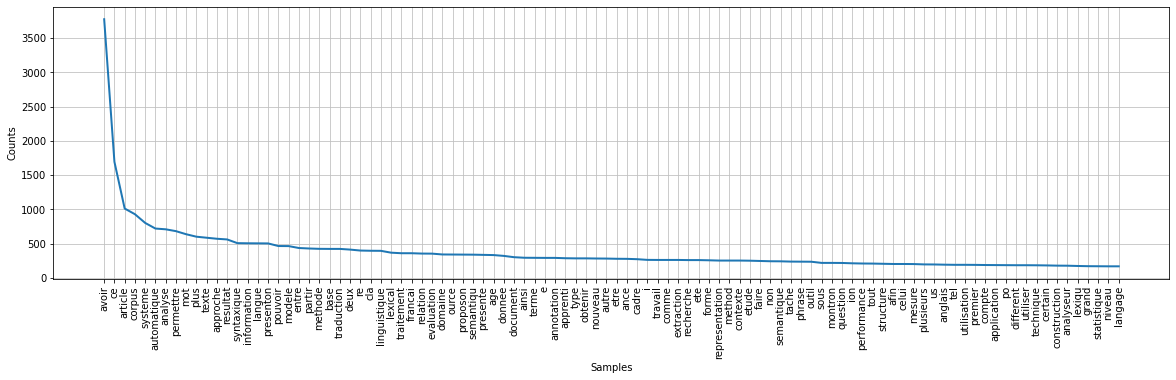

In [ ]:
plt.figure(figsize=(20, 5))
fdist1.plot(100)

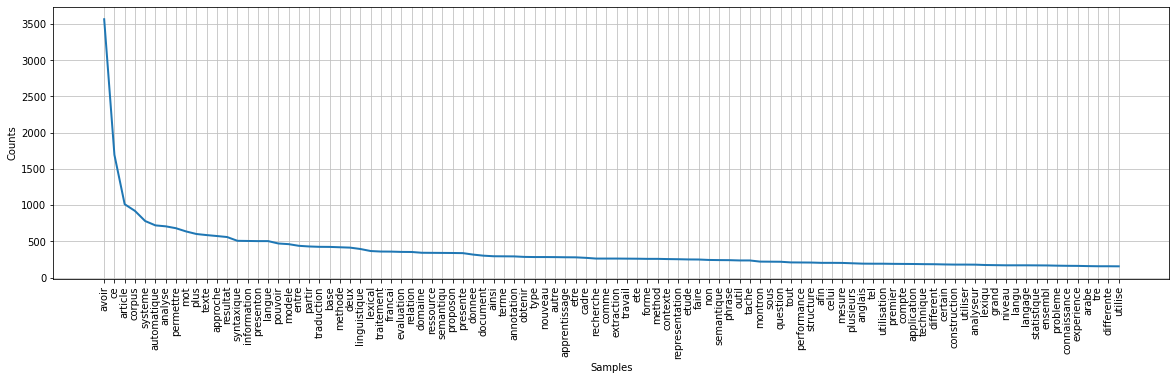

In [ ]:
plt.figure(figsize=(20, 5))
fdist2.plot(100)

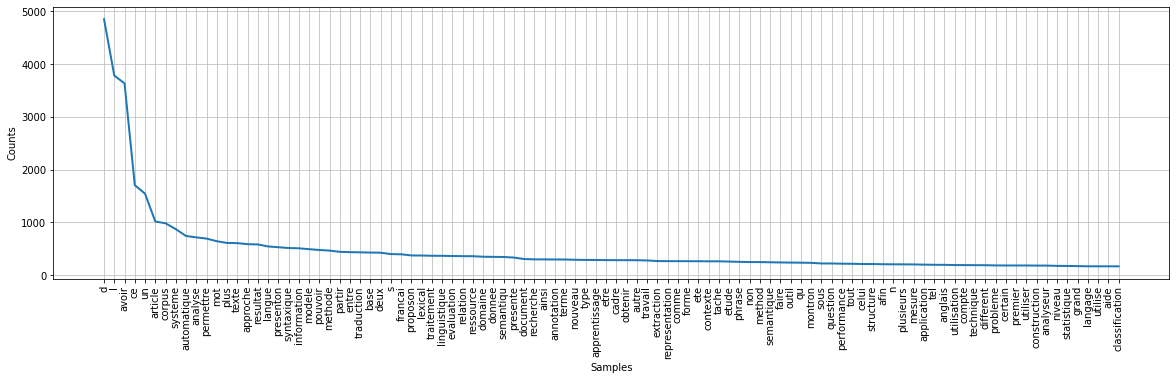

In [ ]:
plt.figure(figsize=(20, 5))
fdist3.plot(100)

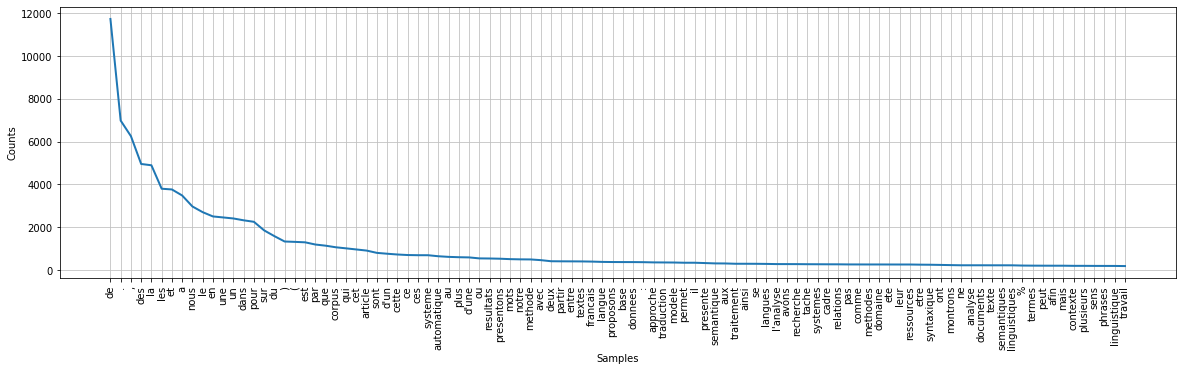

In [ ]:
plt.figure(figsize=(20, 5))
fdist4.plot(100)

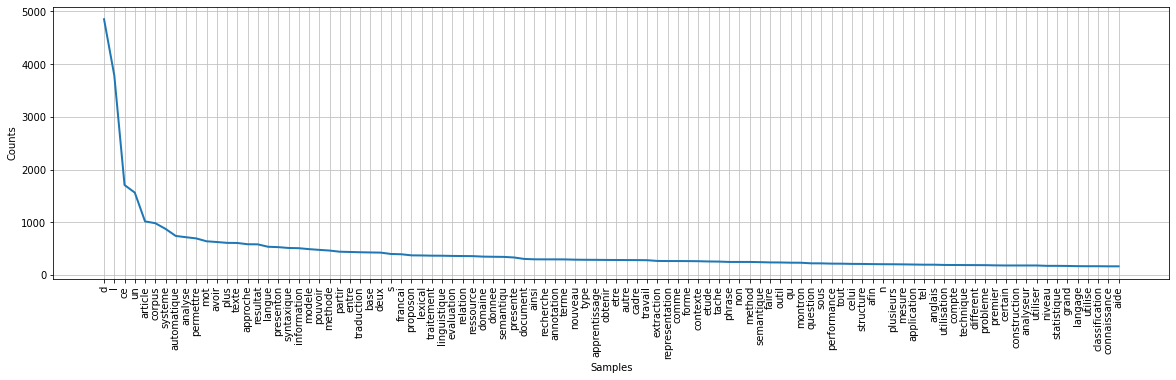

In [ ]:
plt.figure(figsize=(20, 5))
fdist5.plot(100)

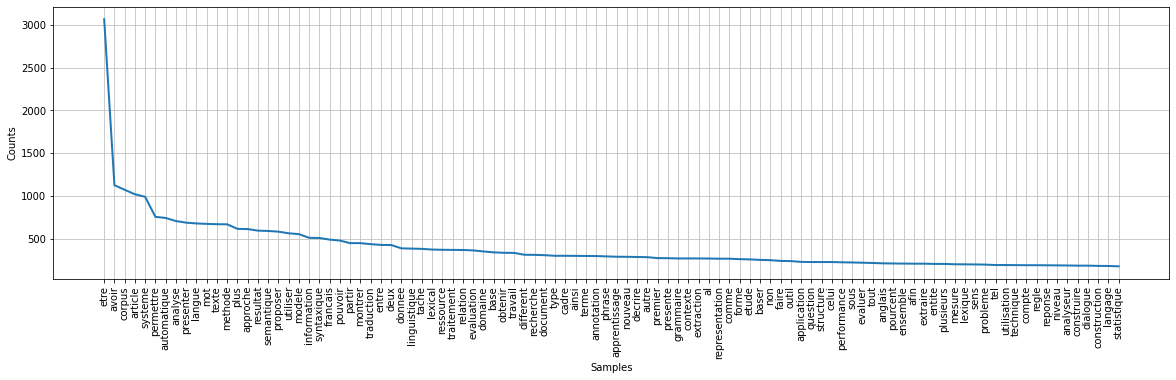

In [ ]:
plt.figure(figsize=(20, 5))
fdist6.plot(100)

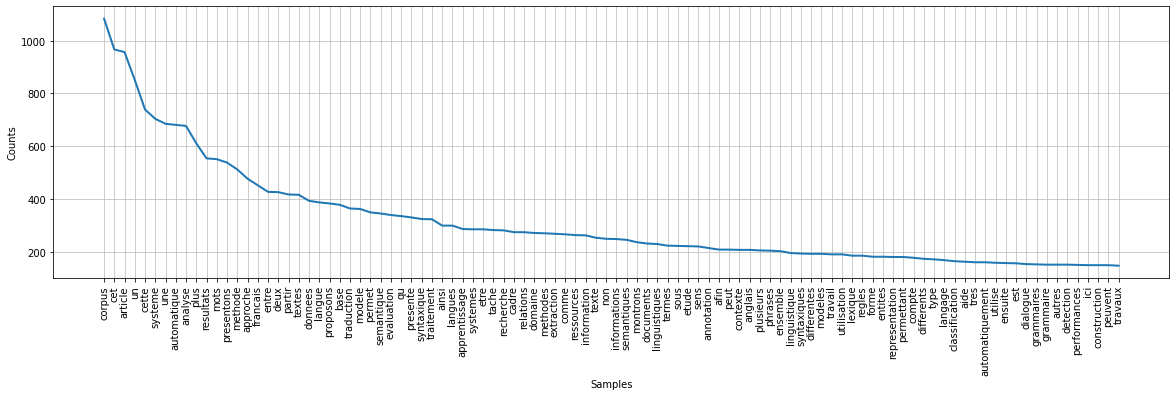

In [ ]:
plt.figure(figsize=(20, 5))
fdist7.plot(100)

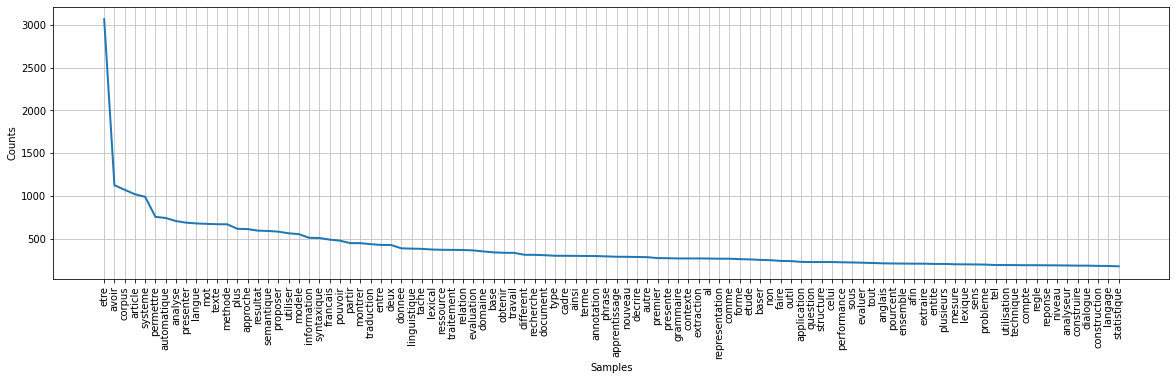

In [ ]:
plt.figure(figsize=(20, 5))
fdist8.plot(100)

D'après les graphiques, on remarque que les processing les plus pertinents sont les deux premiers, l'avant avant dernier et le dernier. En effet, on ne retrouve pas les mots communs de la langue français ou des lettres comme d.
On gardera le dernier, soit avec le processing 8 pour la suite.

#Part of speech

In [ ]:
#On utilise un part of speech français trouver à l'url suivant:
#https://nlp.stanford.edu/software/tagger.shtml
import nltk
from nltk.tag.stanford import StanfordPOSTagger
pos_tagger = StanfordPOSTagger("/content/drive/MyDrive/Advanced_ml/stanford-postagger-full-2020-11-17/models/french-ud.tagger", "/content/drive/MyDrive/Advanced_ml/stanford-postagger-full-2020-11-17/stanford-postagger.jar",encoding='utf8')
def pos_tag(sentence):
    tokens = nltk.word_tokenize(sentence)  
    tags = pos_tagger.tag(tokens) 
    return tags

/usr/local/lib/python3.6/dist-packages/nltk/tag/stanford.py:149: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordPOSTagger, self).__init__(*args, **kwargs)


In [ ]:
#Pour le processing 8 on essaye (risque de ne pas être interresant à cause du lemmatizer)
#On se limite a 50 textes pour l'instant (le temps de calcul est très long pour le part of speech)
part_of_speech_8 = []
fdist_PoS_8 = FreqDist()
i = 0
for text in df["abstract_fr_proc_8"]:
    for word in pos_tag(text):
      fdist_PoS_8[word[1]]+=1
    i += 1
    if i == 50:
      break
     
fdist_PoS_8
    

FreqDist({'ADJ': 700,
          'ADP': 62,
          'ADV': 177,
          'AUX': 135,
          'CCONJ': 3,
          'DET': 12,
          'INTJ': 1,
          'NOUN': 1101,
          'NUM': 29,
          'PRON': 12,
          'PROPN': 2,
          'SCONJ': 3,
          'SYM': 3,
          'VERB': 643,
          'X': 25})

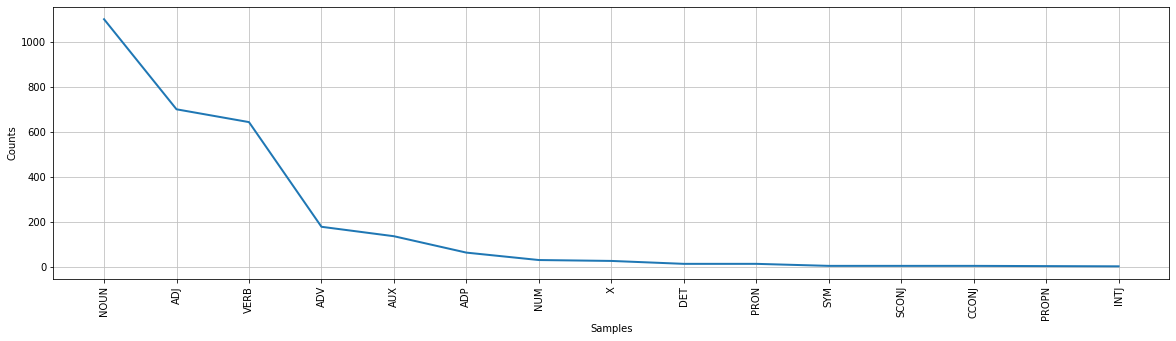

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 5))
fdist_PoS_8.plot(100)

On le voit ici il y a énormement de verbe (assez rare) ce qui est du a la lemmatization   
Comparons avec un processing sans lemmatization

In [ ]:
#Pour observer une différence entre avec ou sans le lemmatizer nous allons utiliser le processing 7
#On se limite aussi au 50 premier texte
part_of_speech_7 = []
fdist_PoS_7 = FreqDist()
i = 0
for text in df["abstract_fr_proc_7"]:
    #print(pos_tag(text))
    for word in pos_tag(text):
      fdist_PoS_7[word[1]]+=1
    i += 1
    if i == 50:
      break
fdist_PoS_7

FreqDist({'ADJ': 833,
          'ADP': 61,
          'ADV': 174,
          'AUX': 17,
          'CCONJ': 4,
          'DET': 121,
          'INTJ': 1,
          'NOUN': 1142,
          'NUM': 29,
          'PRON': 23,
          'PROPN': 1,
          'SCONJ': 12,
          'SYM': 3,
          'VERB': 473,
          'X': 11})

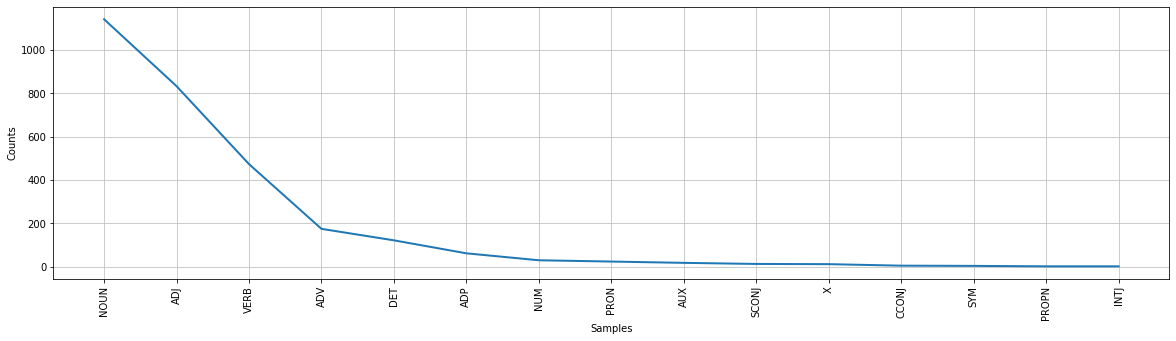

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 5))
fdist_PoS_7.plot(100)

On le voit ici: on a plus de noms (300 en plus) et moins de verbes (200 en moins)  
Nous garderons quand même notre processing 8, le part of speech étant peu utile pour la suite, mais il était intéressant de nuancer nos études des différents processing que nous avons effectué

#N-Gram

Dans cette partie nous allons voir quels sont les unigrams,  bigrams et trigrams les plus fréquents dans les données.

In [ ]:
#Pour faire ce traitement nous avons besoin de réunir tous les abstract et de les word tokenizer
tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')
text_grams = []
for text in df["abstract_fr_proc_8"]:
  tokens = word_tokenize(text)
  print(tokens)
  for token in tokens:
    text_grams.append(token)

['considerer', 'travail', 'tache', 'traitement', 'automatique', 'viser', 'construire', 'partir', 'texte', 'issu', 'corpus', 'constat', 'accident', 'route', 'interpretation', 'compatible', 'dernier', 'proposer', 'illustration', 'sous', 'forme', 'sequence', 'image', 'fixe', 'recherche', 'etre', 'fruit', 'collaboration', 'entre', 'laboratoire', 'universitaire', 'entreprise', 'prendre', 'appui', 'modele', 'grammaire', 'applicatif', 'cognitif', 'vise', 'particulier', 'expliquer', 'certain', 'niveau', 'cognitif', 'transfert', 'entre', 'representation', 'image', 'verbal', 'revue', 'question', 'relatif', 'transcription', 'automatique', 'verbal', 'image', 'renvoyer', 'plus', 'particulierement', 'travail', 'vandelois', 'groupe', 'langue', 'raisonnement', 'calcul', 'universite', 'paul', 'sabatier', 'ainsi', 'al', 'approche', 'proposer', 'systeme', 'sprint', 'plus', 'proche', 'encore', 'preoccupation', 'victorri', 'enjalbert', 'posent', 'probleme', 'animation', 'visuel', 'issu', 'interpretation', 

In [ ]:
#Commençons par essayer le bigrams
bigrams = list(nltk.bigrams(text_grams))
bigrams

[('considerer', 'travail'),
 ('travail', 'tache'),
 ('tache', 'traitement'),
 ('traitement', 'automatique'),
 ('automatique', 'viser'),
 ('viser', 'construire'),
 ('construire', 'partir'),
 ('partir', 'texte'),
 ('texte', 'issu'),
 ('issu', 'corpus'),
 ('corpus', 'constat'),
 ('constat', 'accident'),
 ('accident', 'route'),
 ('route', 'interpretation'),
 ('interpretation', 'compatible'),
 ('compatible', 'dernier'),
 ('dernier', 'proposer'),
 ('proposer', 'illustration'),
 ('illustration', 'sous'),
 ('sous', 'forme'),
 ('forme', 'sequence'),
 ('sequence', 'image'),
 ('image', 'fixe'),
 ('fixe', 'recherche'),
 ('recherche', 'etre'),
 ('etre', 'fruit'),
 ('fruit', 'collaboration'),
 ('collaboration', 'entre'),
 ('entre', 'laboratoire'),
 ('laboratoire', 'universitaire'),
 ('universitaire', 'entreprise'),
 ('entreprise', 'prendre'),
 ('prendre', 'appui'),
 ('appui', 'modele'),
 ('modele', 'grammaire'),
 ('grammaire', 'applicatif'),
 ('applicatif', 'cognitif'),
 ('cognitif', 'vise'),
 ('vis

In [ ]:
bigram_series = pd.Series(bigrams).value_counts()[:10]
bigram_series

(avoir, etre)                243
(article, presente)          194
(pouvoir, etre)              177
(traitement, automatique)    144
(entite, nommer)             121
(article, presenter)         121
(traduction, automatique)    118
(analyse, syntaxique)        104
(partir, corpus)              97
(automatique, langue)         91
dtype: int64

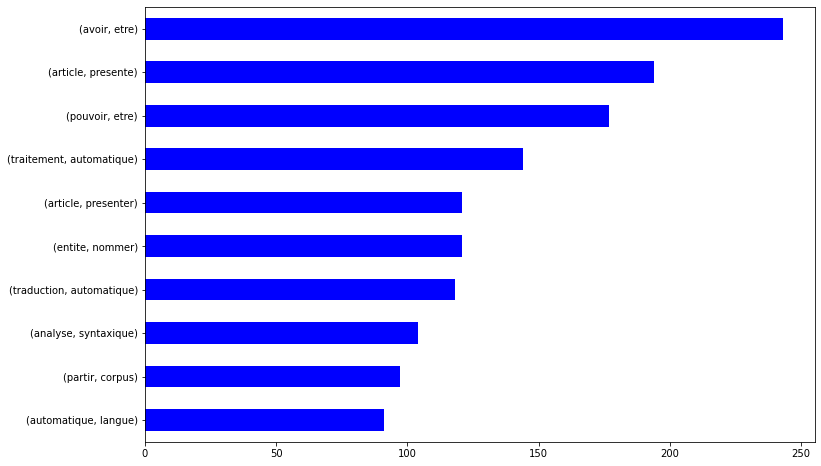

In [ ]:
bigram_series.sort_values().plot.barh(color='blue', figsize=(12, 8))

Le bigram nous donne comme duo le plus utilisé (avoir et être), sachant que le texte est lemmatizé, il peu s'agir d'un particpe passé ou autre chose.  
Ce bigram ne donne que peux d'info : deuxième couple (article et présente) et assez interresant pour le coup  
Essayons le trigram

In [ ]:
#Essayons le trigrams
trigrams = list(nltk.trigrams(text_grams))
trigrams

In [ ]:
trigram_series = pd.Series(trigrams).value_counts()[:10]
trigram_series

(traitement, automatique, langue)         88
(systeme, question, reponse)              37
(systeme, traduction, automatique)        32
(reconnaissance, entite, nommer)          31
(pouvoir, etre, utiliser)                 25
(traduction, automatique, statistique)    25
(article, presente, methode)              24
(grammaire, arbre, adjoint)               22
(traitement, automatique, langage)        22
(etiquetage, morpho, syntaxique)          22
dtype: int64

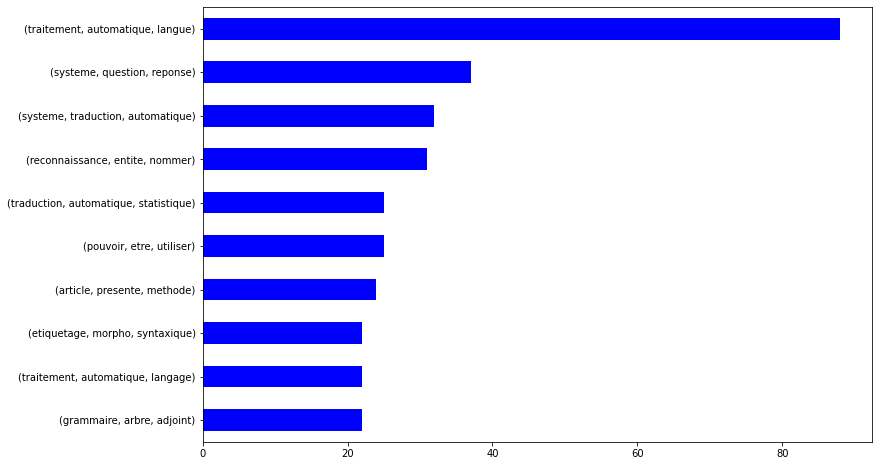

In [ ]:
trigram_series.sort_values().plot.barh(color='blue', figsize=(12, 8))

Le trigram est beaucoup plus pertinent en effet toutes lesa ssociations de mots montrent un des sujets bien précis et sont porteurs d'infomration  
On remarque de plus que le trigram est moins sensible au lemmmatizer  
Essayons maintenant un ngrams de 5 mots

In [ ]:
ngrams = list(nltk.ngrams(text_grams,5))
ngrams

In [ ]:
ngram_series = pd.Series(ngrams).value_counts()[:10]
ngram_series

(none, none, none, none, none)                          7
(extraction, lexique, bilingue, partir, corpus)         6
(traitement, automatique, langue, tal, article)         4
(apprentissage, langue, assister, ordinateur, alao)     3
(traitement, automatique, langue, article, presente)    3
(ameliore, aussi, bien, qualite, alignement)            3
(cadre, projet, intitule, oreodule, systeme)            3
(domaine, traitement, automatique, langage, naturel)    3
(avoir, etre, realiser, cadre, projet)                  3
(traitement, automatique, langue, naturel, taln)        3
dtype: int64

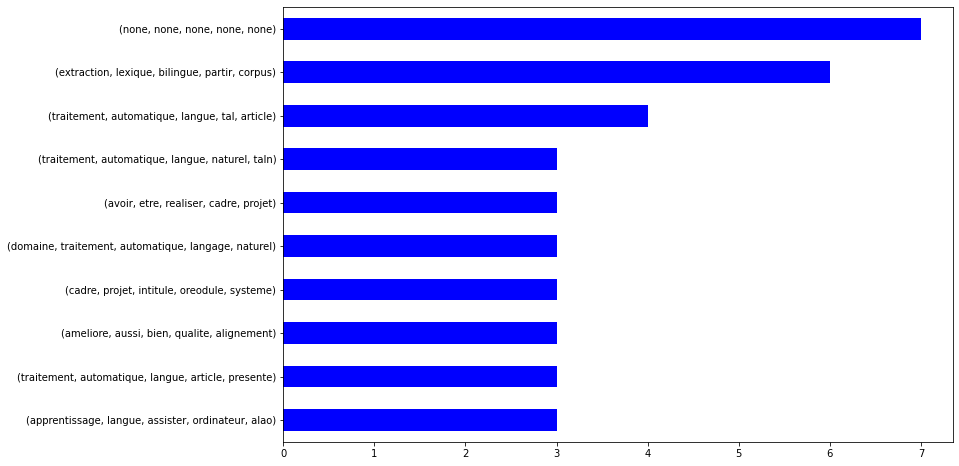

In [ ]:
ngram_series.sort_values().plot.barh(color='blue', figsize=(12, 8))


Le ngrams montrent une lacune du aux fait qu'il y at des corpus vide: en effet l'ocurence qui revient le plus est l'association de none 5 fois  
En revanche toutes les autres associations sont très intéressantes puiqu'elles révèlent des sujets concrets dans le text

# Dirichlet
Dans la dernière partie on procède à une allocation de Dirichlet latente pour mettre en évidence des pacquets de mots que l'on retrouve dans les publications.
Pour faire cela on va utiliser la librairie scikit-learn.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

In [ ]:
corpus = df[["abstract_fr_proc_8"]]

In [ ]:
corpus = corpus["abstract_fr_proc_8"].to_list()

In [ ]:
vect = CountVectorizer(max_features=10000, max_df=0.15)
X = vect.fit_transform(corpus)

In [ ]:
lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=25, random_state=6)
corpus_topics = lda.fit_transform(X)

In [ ]:
print(f"lda.components_.shape {lda.components_.shape}")

lda.components_.shape (10, 7572)


In [ ]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
features_names = np.array(vect.get_feature_names())

On a récupéré cette fonction sur un github pour afficher les pacquets de mots.

In [ ]:
def print_topics(topics, feature_names, sorting, topics_per_chunk=6,
                 n_words=20):
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")

Dans la représentation d'en-dessous, on remarque une certaine logique dans certains pacquets, comme dans le topic 5, alors que dans d'autres cela est difficilement compréhensible. Un axe d'amélioration aurait été d'utiliser un k-means pour déterminer le nombre de topics pour voir qu'elle saurait la composition des topics.

In [ ]:
print_topics(topics=range(10), feature_names=features_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
pourcent      traduction    arabe         conversation  domaine       
phrase        statistique   resume        oral          annotation    
tweet         alignement    annotation    parole        lexique       
performance   bilingue      langage       apprentissage ressource     
reconnaissanceanglais       utilisateur   etude         recherche     
classificationqualite       medical       segmentation  extraction    
analyseur     parallele     etudier       annotation    pourcent      
mesure        phrase        document      erreur        terme         
schema        traduire      regle         baser         outil         
entite        baser         recherche     evaluer       apprentissage 


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
anno

#TF-IDF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Nous allons réutiliser text_grams puisqu'il s'agit de tout nos corpus (les abstract) word tokenizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(text_grams)
feature_names = vectorizer.get_feature_names()

#K-means
Nous allons essayer le modèle k-means qui nécessitait le tf-idf

In [ ]:
from sklearn.cluster import KMeans
from sklearn import cluster

In [ ]:
words = vectorizer.get_feature_names()
kmeans = KMeans(n_clusters = 10, n_init = 17,  max_iter = 200)
#fit the data 
kmeans.fit(vectors)
#this loop transforms the numbers back into words
common_words = kmeans.cluster_centers_.argsort()[:,-1:-10:-1]
clusters_words = []
nb_clusters = []
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))
    clusters_words.append( ', '.join(words[word] for word in centroid))



df_clusters = pd.DataFrame({ 'clusters_words':clusters_words})

0 : corpus, article, systeme, automatique, presenter, langue, mot, texte, methode
1 : semantique, zpar, emprunter, encadrement, enchaine, enchainee, enchainement, enchainer, enchasser
2 : apprentissage, zpar, encourageant, enchainee, enchainement, enchainer, enchasser, enclencher, enclitique
3 : aide, zpar, encore, enchaine, enchainee, enchainement, enchainer, enchasser, enclencher
4 : etre, zpar, encontre, encadrement, enchaine, enchainee, enchainement, enchainer, enchasser
5 : permettre, zpar, encore, enchaine, enchainee, enchainement, enchainer, enchasser, enclencher
6 : erreur, zpar, encore, enchaine, enchainee, enchainement, enchainer, enchasser, enclencher
7 : relation, zpar, encodeur, en, encadrement, enchaine, enchainee, enchainement, enchainer
8 : analyse, zpar, encourageant, enchainee, enchainement, enchainer, enchasser, enclencher, enclitique
9 : avoir, zpar, enchainee, enchainement, enchainer, enchasser, enclencher, enclitique, encodage


On peut remarquer des anomalies dans les cluster (comme le mot zpar)  
Mais on peut remarquer aussi que beaucoup de mot de la famille "enchainer" sont présents dans différents clusters, ce mot seul n'ayant que peu se sens ils pourrait être pertinent de les jeter pour la suite  
En conclusion le premier cluster est interresant mais tous les autres ont l'air erronés par beaucoup de mots proches (pas dans le sens mais par leur orthographe).  
Ce k-means n'est donc pas très concluant

In [ ]:
df_clusters

,clusters_words
0,"corpus, article, systeme, automatique, present..."
1,"semantique, zpar, emprunter, encadrement, ench..."
2,"apprentissage, zpar, encourageant, enchainee, ..."
3,"aide, zpar, encore, enchaine, enchainee, encha..."
4,"etre, zpar, encontre, encadrement, enchaine, e..."
5,"permettre, zpar, encore, enchaine, enchainee, ..."
6,"erreur, zpar, encore, enchaine, enchainee, enc..."
7,"relation, zpar, encodeur, en, encadrement, enc..."
8,"analyse, zpar, encourageant, enchainee, enchai..."
9,"avoir, zpar, enchainee, enchainement, enchaine..."
